# Name : Sunita Samantasinghar
### Post Graduate Program in Artificial Intelligence and Machine Learning
2022-2023

# Ensemble Techniques Project
## Part A
### • CONTEXT: 
A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
### • DATA DESCRIPTION:
 Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents.

#### IMPORT ALL THE REQUIRED PACKAGES

In [885]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from numpy import percentile as percentile
from numpy.random import rand
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve, f1_score, fbeta_score, make_scorer, precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB, BernoulliNB,CategoricalNB,ComplementNB
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import optuna

#### Part 1- 1 a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [886]:
df1=pd.read_csv(r'C:\Users\Datta\Downloads\TelcomCustomer-Churn_1.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


#### Part 1- 1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [887]:
df2=pd.read_csv(r'C:\Users\Datta\Downloads\TelcomCustomer-Churn_2.csv')
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Part 1- 1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [888]:
df = pd.merge(df1, df2, on="customerID")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [889]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Part 1- 1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python.

In [890]:
option1 = df1.merge(df2, on='customerID', how='outer')
print(option1[option1.isna().any(axis=1)])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Part 1- 2 a Impute missing/unexpected values in the DataFrame

In [892]:
df.isnull().any().any()

False

In [893]:
df.shape

(7043, 21)

In [895]:
data = df.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [896]:
data[data["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [897]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Total 11 records with missing **TotalCharges**

In [898]:
data[data["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [899]:
#data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)
data.fillna(data["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [900]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [901]:
print(data['SeniorCitizen'].unique())
print(data['TotalCharges'].nunique())

[0 1]
6530


#### part 1- 2 b Make sure all the variables with continuous values are of ‘Float’ type

In [902]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

In [903]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN) # This column had missing values represented by ' '. I noticed it when I tried converting it to float and it gave me an error that it could not convert string to float
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median()) # I will fill the missing values with median

In [904]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [905]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 
                                                                'DeviceProtection', 'TechSupport', 
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [906]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes']
OnlineBackup : ['Yes', 'No']
DeviceProtection : ['No', 'Yes']
TechSupport : ['No', 'Yes']
StreamingTV : ['No', 'Yes']
StreamingMovies : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [907]:
data['tenure'].value_counts(ascending= False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [908]:
data['tenure']  = data['tenure'].replace(0, np.NaN)
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

#### Part 1- 2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [909]:
data.InternetService.describe(include=["object", "bool"])

count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [910]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [911]:
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [912]:
data.Churn[data.Churn == "Yes"].groupby(by = data.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

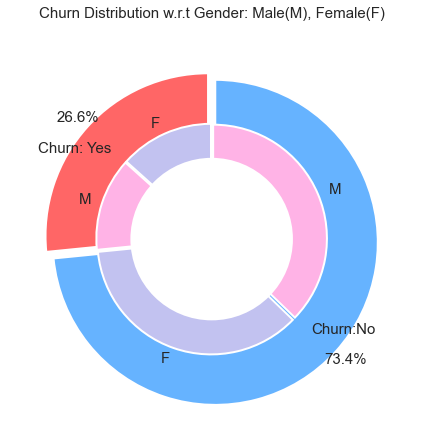

In [913]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Part 1- 2 d.Share insights for Q2.c

- The dataset is not properly balanced.
- Out of all the customers, 73.4% of people won't churn and 26.6% of customer churn.
- In 26.6% of churn customer approx. 50% male and 50% female are there.i.e Female : 939 and Male : 930
- By splitting the dataset we can have more balanced data.

#### Part 1 - 2 e.Encode all the appropriate Categorical features with the best suitable approach

In [914]:
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

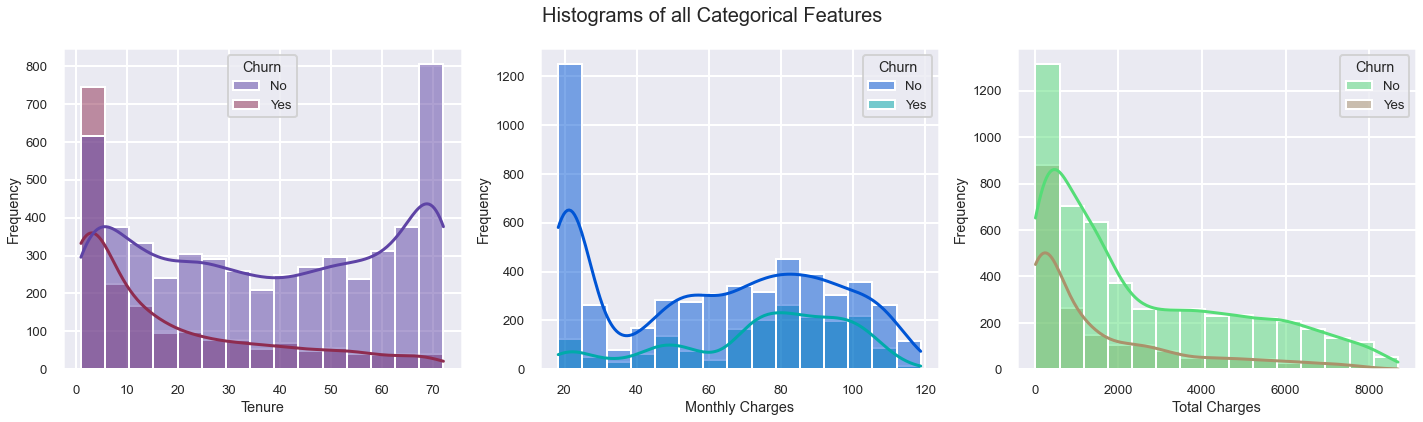

In [915]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Categorical Features', fontsize = 20)

ax1 = sns.histplot(x = data['tenure'],color= 'teal', hue= data['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'twilight')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['MonthlyCharges'], color= 'teal', hue= data['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'winter')
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['TotalCharges'], color= 'teal', hue= data['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'terrain')
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

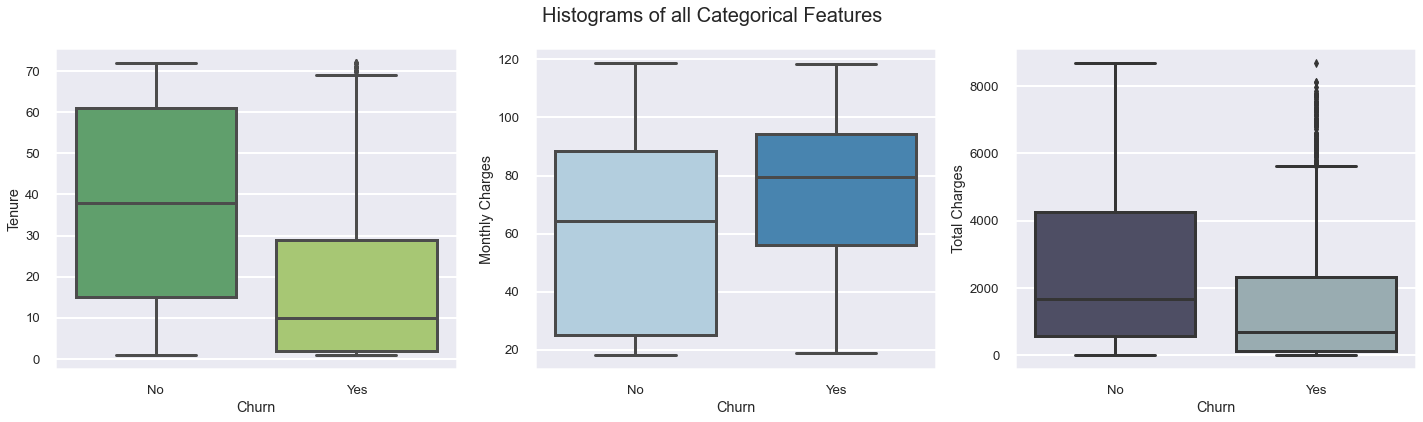

In [917]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Categorical Features', fontsize = 20)

ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0], palette= 'summer')
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1], palette= 'Blues')
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2], palette= 'bone')
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

In [918]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])

In [919]:
#dummies_payment = pd.get_dummies(data['PaymentMethod'], drop_first= True)
#data = pd.concat([data, dummies_payment], axis=1)
data.drop('PaymentMethod',axis =1 , inplace= True)

In [920]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

data['InternetService'] = data['InternetService'].apply(lambda x: internet_ordering.index(x))
data['Contract'] = data['Contract'].apply(lambda x: contract_ordering.index(x))

In [921]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int32  
 16  MonthlyCharges    7043 non-null   float64


In [922]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0
1,1,0,0,0,34.0,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1
3,1,0,0,0,45.0,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1


<AxesSubplot:>

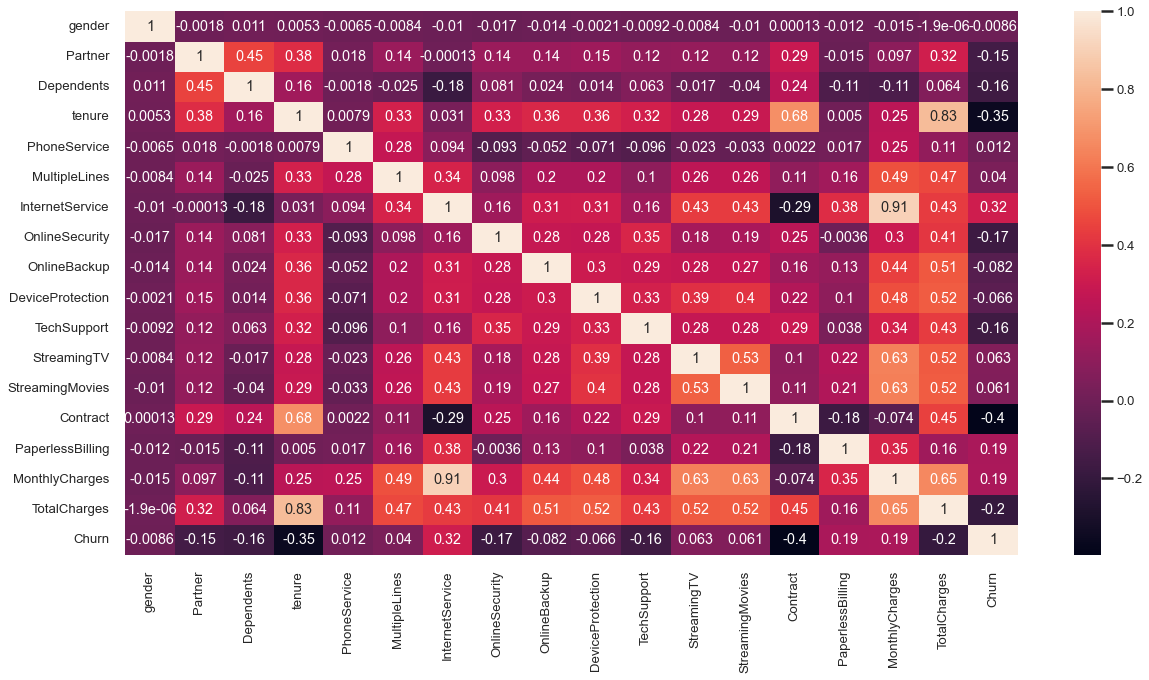

In [923]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

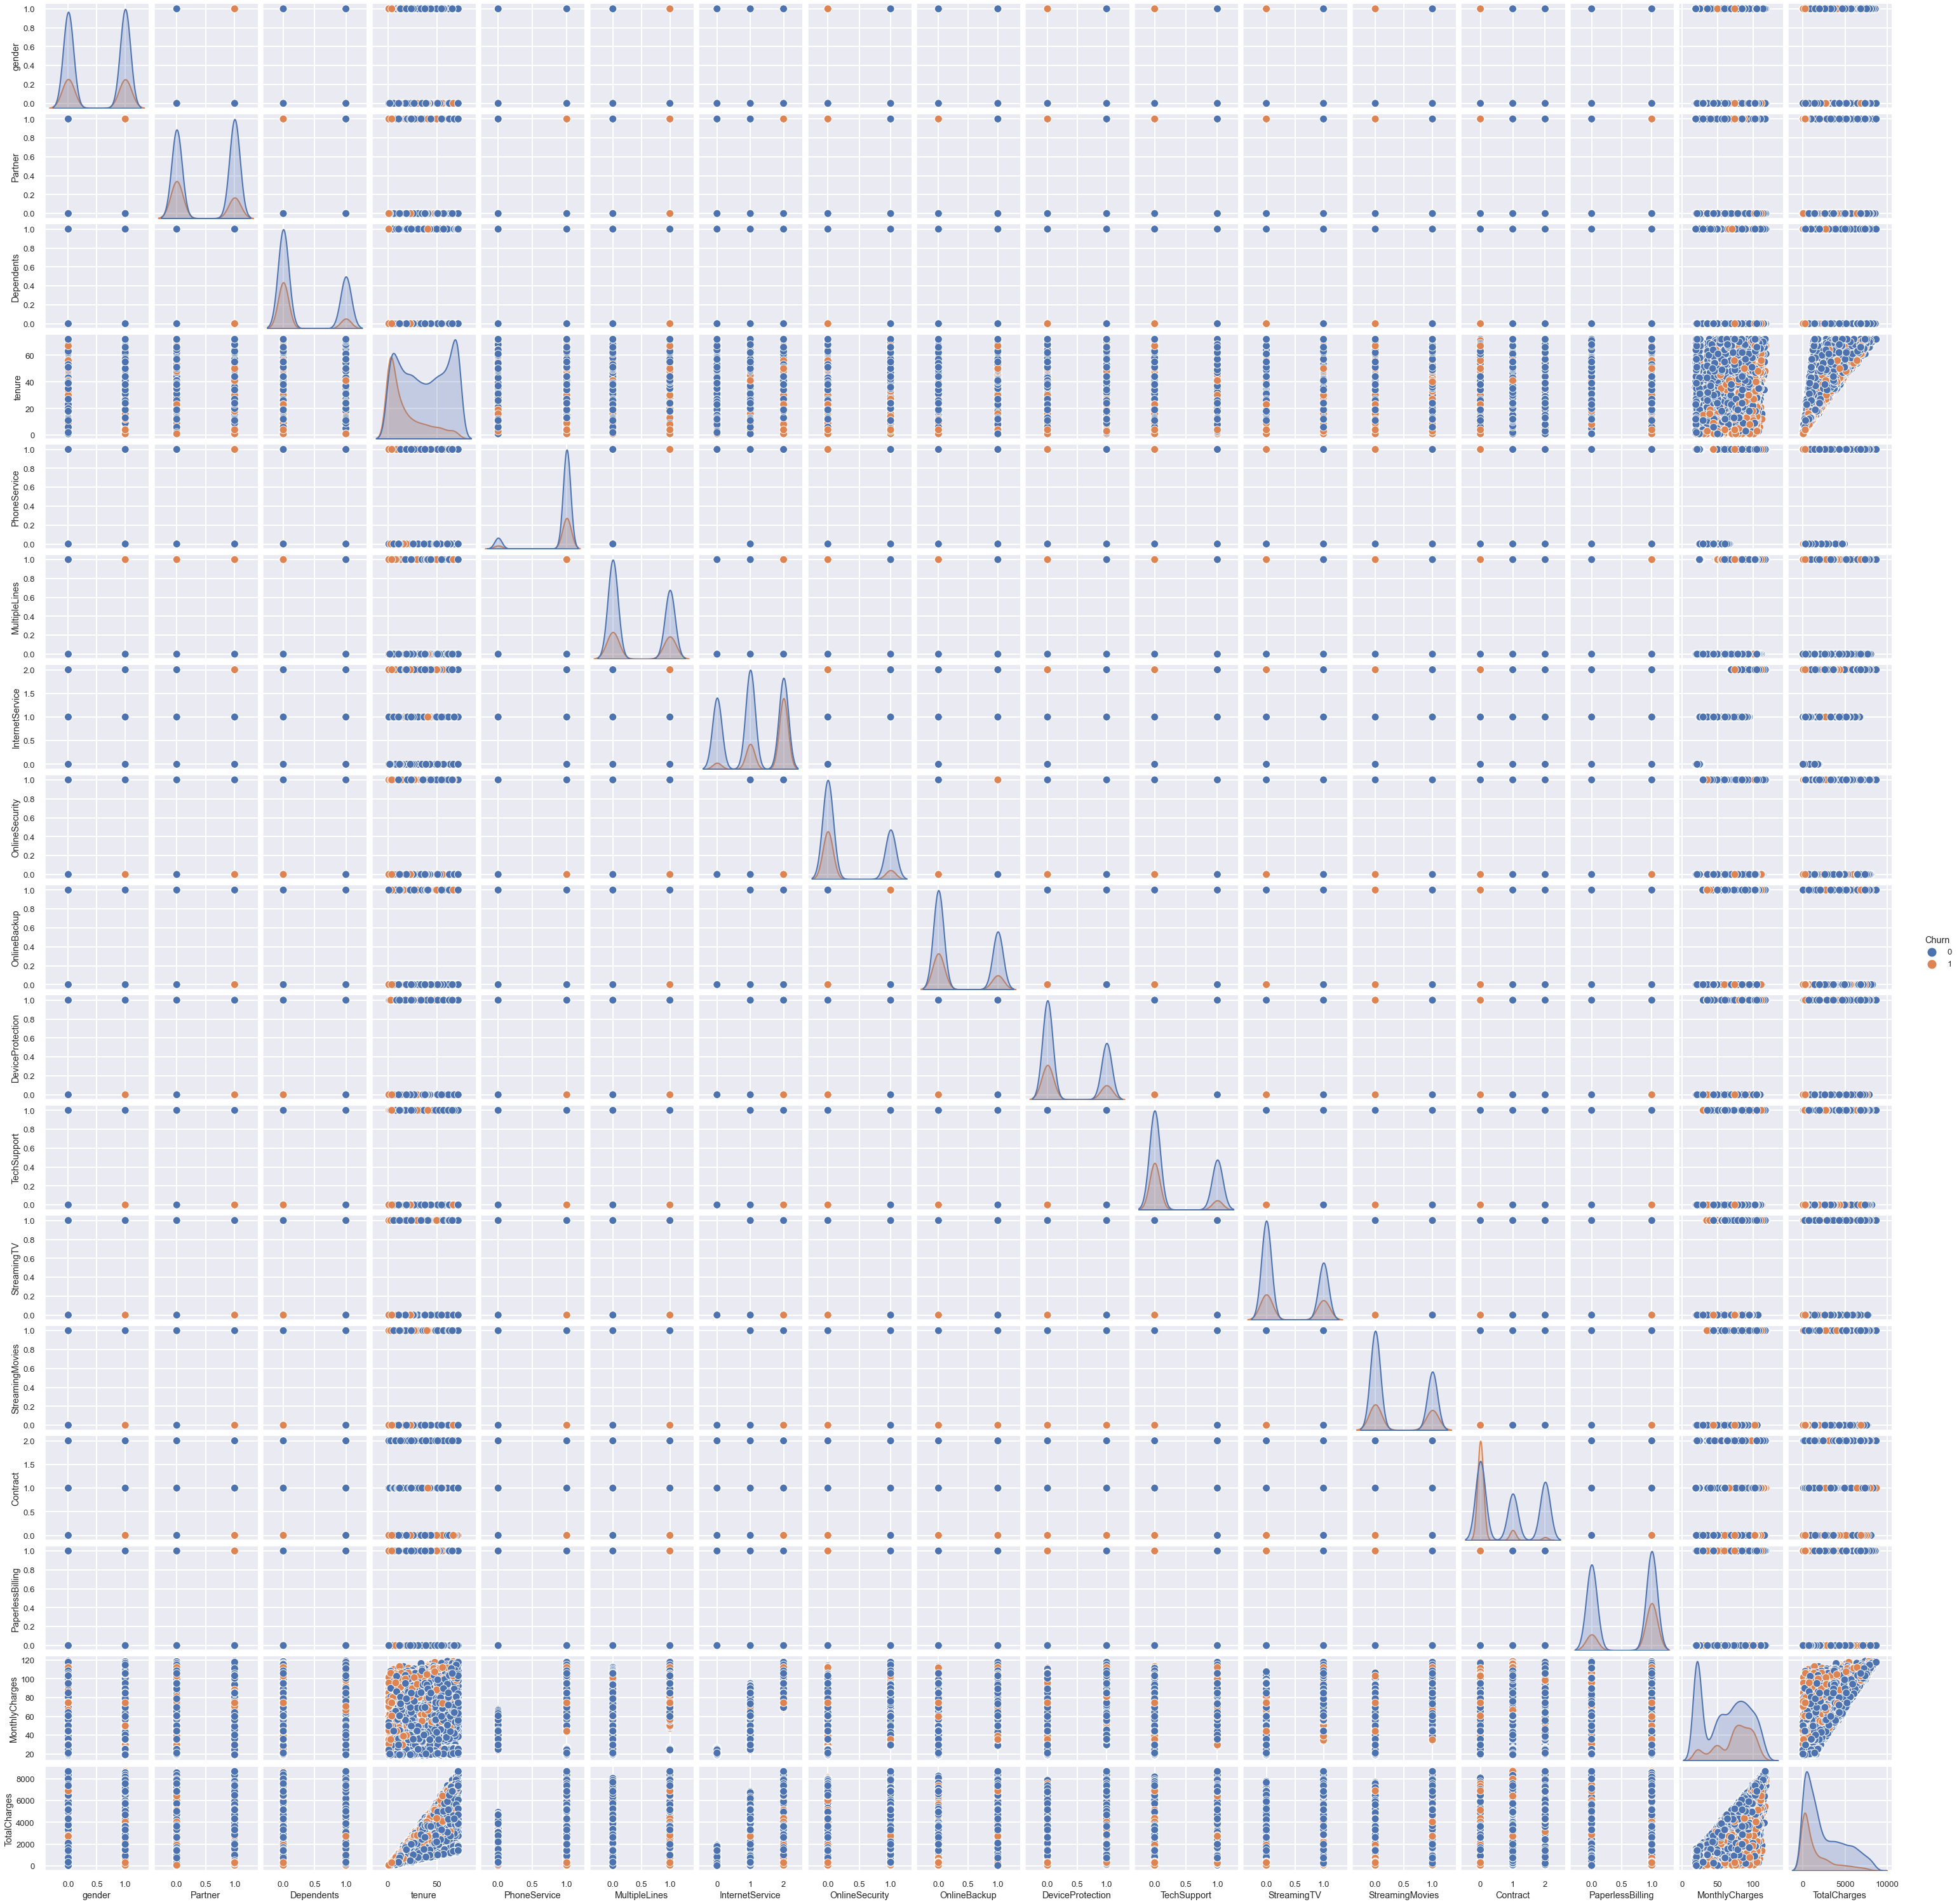

In [570]:
sns.pairplot(data,hue='Churn')

In [924]:
data['TotalCharges'] = np.log(data['TotalCharges'])

#### Part 1- 2 f.Split the data into 80% train and 20% test.

In [925]:
X = data.drop('Churn', axis= 1)
y = data['Churn']

In [926]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify =y)

In [927]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


#### Part 1 - 2 g.Normalize/Standardize the data with the best suitable approach

In [928]:
data.describe()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.483033,0.299588,32.416442,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,64.761692,6.939953,0.265370
std,0.500013,0.499748,0.458110,24.526454,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,30.090047,1.551968,0.441561
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.933857,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,5.997011,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,7.242422,0.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,8.239224,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.750000,9.069330,1.000000


In [929]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


#### Part 1 - 3 a. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [971]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Iterate over column names
for column in X_train:
    if X_train['SeniorCitizen'].dtype.kind == '1':
        X_train['SeniorCitizen']= label_encoder.fit_transform(X_train['SeniorCitizen'])

In [979]:
X_train['SeniorCitizen'] = pd.to_numeric(X_train['SeniorCitizen'])

In [980]:
print(X_train.dtypes)

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure              float64
PhoneService          int32
MultipleLines         int32
InternetService       int64
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int64
PaperlessBilling      int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [981]:
model = XGBClassifier()
evalset = [(X_train, y_train), (X_test,y_test)]

In [982]:
models = {
    'logistic regression' : LogisticRegression(),
    'xgboost' : XGBClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier()
}

In [983]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be r

logistic regression trained
[20:43:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost trained
naive bayes trained
random forest trained


In [984]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Datta\anaconda3\lib\site-packages

[20:43:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[20:43:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [939]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic regression : 0.8522614454541
----------------
xgboost : 0.8246486711336457
----------------
naive bayes : 0.8362996445763009
----------------
random forest : 0.8229383231858026


In [940]:
def lr_objective(trial):
    tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
    C = trial.suggest_float('C', 0, 0.1)
    max_iter = trial.suggest_int('max_iter', 50, 600)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    model = LogisticRegression(
        solver= 'liblinear',
        penalty = penalty,
        tol= tol,
        C= C,
        max_iter= max_iter
    )

    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)

    return np.mean(cv_score)

study = optuna.create_study(direction= 'maximize')
study.optimize(lr_objective, n_trials= 100)

[I 2022-09-04 20:32:07,445] A new study created in memory with name: no-name-821884ca-abe4-44f0-a93d-416d3fbc9b4e
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:32:12,614] Trial 0 finished with value: 0.8482229696890686 and parameters: {'tol': 5.274461962114286e-06, 'C': 0.09329212102757445, 'max_iter': 206, 'penalty': 'l1'}. Best is trial 0 with value: 0.8482229696890686.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:32:13,057] Trial 1 finished with value: 0.8076872394212484 and pa

[I 2022-09-04 20:32:21,814] Trial 15 finished with value: 0.8494121043303938 and parameters: {'tol': 0.000241750517093469, 'C': 0.07511598575363092, 'max_iter': 502, 'penalty': 'l2'}. Best is trial 14 with value: 0.8494192329704855.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:32:22,117] Trial 16 finished with value: 0.8494583632766041 and parameters: {'tol': 0.0009355546437264474, 'C': 0.08087699814012798, 'max_iter': 472, 'penalty': 'l2'}. Best is trial 16 with value: 0.8494583632766041.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optun

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[I 2022-09-04 20:32:29,648] Trial 29 finished with value: 0.8482034327793014 and parameters: {'tol': 5.8490720201535295e-05, 'C': 0.09970573550776926, 'max_iter': 56, 'penalty': 'l1'}. Best is trial 27 with value: 0.8495818258323892.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:32:29,996] Trial 30 finished with value: 0.8495498290255362 and parameters: {'tol': 4.288061921715972e-06, 'C': 0.0904972490228114, 'max_iter': 183, 

C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:32:52,279] Trial 44 finished with value: 0.8494544187530435 and parameters: {'tol': 1.89290903299503e-06, 'C': 0.08012745503727176, 'max_iter': 127, 'penalty': 'l2'}. Best is trial 27 with value: 0.8495818258323892.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:32:52,663] Trial 45 finished with value: 0.8495626508228857 and parameters: {'tol': 2.479192008262772e-07, 'C': 0.09514664631303182, 'max_iter': 81, 'penalty': 'l2'}. Best is tri

[I 2022-09-04 20:33:00,027] Trial 59 finished with value: 0.8495847954675411 and parameters: {'tol': 2.470464268753002e-07, 'C': 0.09989571498042893, 'max_iter': 76, 'penalty': 'l2'}. Best is trial 59 with value: 0.8495847954675411.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:33:00,451] Trial 60 finished with value: 0.8495798888442051 and parameters: {'tol': 2.2356690960996846e-07, 'C': 0.09977673127874974, 'max_iter': 79, 'penalty': 'l2'}. Best is trial 59 with value: 0.8495847954675411.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optun

[I 2022-09-04 20:33:12,402] Trial 72 finished with value: 0.8495653671451746 and parameters: {'tol': 1.4825682463222862e-07, 'C': 0.09906499055895678, 'max_iter': 50, 'penalty': 'l2'}. Best is trial 61 with value: 0.8495895611737299.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:33:12,821] Trial 73 finished with value: 0.8495644985842793 and parameters: {'tol': 4.795266258396973e-07, 'C': 0.09212743834290331, 'max_iter': 112, 'penalty': 'l2'}. Best is trial 61 with value: 0.8495895611737299.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optu

C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:33:27,451] Trial 88 finished with value: 0.8495815478947991 and parameters: {'tol': 3.8496220622779504e-07, 'C': 0.09992432514696462, 'max_iter': 69, 'penalty': 'l2'}. Best is trial 61 with value: 0.8495895611737299.
C:\Users\Datta\AppData\Local\Temp\ipykernel_4536\1897857987.py:2: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

[I 2022-09-04 20:33:27,835] Trial 89 finished with value: 0.8495774756688318 and parameters: {'tol': 7.325280151354191e-07, 'C': 0.09353116385932603, 'max_iter': 135, 'penalty': 'l2'}. Best is t

In [780]:
study.best_params

{'tol': 0.00021140209156303183,
 'C': 0.09467158197775281,
 'max_iter': 280,
 'penalty': 'l2'}

#### Part 1 - 3 b Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [1033]:
model_n = XGBClassifier()
model_n.fit(X_train,y_train) #Here we are fitting our model
y_pred = model_n.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Datta\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[21:24:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1050]:
clf = xgb.XGBClassifier(
    tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False
)

In [1052]:
eval_set = [(X_train, y_train), (X_test, y_test)]
#model_n.fit(X_train, y_train.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

In [1036]:
yhat = model_n.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.785


In [1055]:
#eval_set = [(X_test, y_test)]
#model_n.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

In [1054]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

KeyError: 'validation_0'

### Part B

### • CONTEXT: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset

In [1056]:
def load_dataset(filename, filetype='csv', header=True):

    in_file = open(filename)
    data = []
    header_row = ''

    # Read the file line by line into instance structure
    for line in in_file.readlines():

        # Skip comments
        if not line.startswith("#"):
            
            if filetype =='csv':
                if header:
                    header_row = line.strip().split(',')
                else:
                    raw = line.strip().split(',')
            
            # Neither = problem
            else:
                print('Invalid file type')
                exit()

            # Append to dataset appropriately
            if not header:
                data.append(raw)
            header = False
    
    # Build a new dataframe of the data instance list of lists and return
    df = pd.DataFrame(data, columns=header_row)
    return df

In [1057]:
def to_numeric(dataset, attr_name):
    
    # Get unique entries in column
    unique_vals = dataset[attr_name].unique()
    
    # Create dict
    val_dict = {}
    for val in unique_vals:
        if not val in val_dict:
            val_dict[val] = len(val_dict)
    
    # Replace values in attr_name col as per dict
    dataset[attr_name].replace(val_dict, inplace=True)
    
    # Return dataset and value dictionary
    return dataset, val_dict

In [1058]:
dataset_1 = load_dataset(r'C:\Users\Datta\Downloads\TelcomCustomer-Churn_1.csv')

In [1059]:
dataset_2 = load_dataset(r'C:\Users\Datta\Downloads\TelcomCustomer-Churn_2.csv')

In [1060]:
# Merge two datset
def merge_datset(dataset_1, dataset_2):
    dataset_new = pd.merge(dataset_1, dataset_2, on="customerID")
    return dataset_new

In [1061]:
merge_datset(dataset_1,dataset_2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [1062]:
def basic_info(dataset_new):
    '''checking basic information & shape about the dataframe'''
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(dataset_new.info())
    
basic_info(df)

Shape of the dataset (7043, 21)
******************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non

In [1063]:
def check_missing_values(dataset_new):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",dataset_new.isnull().sum()/len(df)*100)
    
check_missing_values(dataset_new)

percentage of missing data of dataframe 
 gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [1064]:
def basic_statistics(dataset_new):
    return df.describe().T

basic_statistics(dataset_new)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [1065]:
to_numeric(dataset_new, 'TotalCharges')

(      gender  SeniorCitizen Partner Dependents tenure PhoneService  \
 0     Female              0     Yes         No      1           No   
 1       Male              0      No         No     34          Yes   
 2       Male              0      No         No      2          Yes   
 3       Male              0      No         No     45           No   
 4     Female              0      No         No      2          Yes   
 ...      ...            ...     ...        ...    ...          ...   
 7038    Male              0     Yes        Yes     24          Yes   
 7039  Female              0     Yes        Yes     72          Yes   
 7040  Female              0     Yes        Yes     11           No   
 7041    Male              1     Yes         No      4          Yes   
 7042    Male              0      No         No     66          Yes   
 
          MultipleLines InternetService OnlineSecurity OnlineBackup  \
 0     No phone service             DSL             No          Yes   
 1  

In [1066]:
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

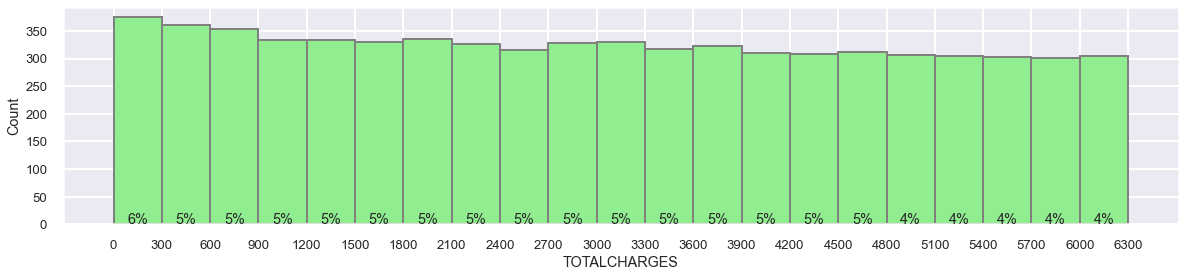

In [1067]:
plot_hist(dataset_new,'TotalCharges',300)

In [1068]:
px.box(dataset_new,dataset_new.PaymentMethod,dataset_new.MonthlyCharges,color='PaymentMethod')

In [1069]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [1070]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify = Y, test_size = 0.25, random_state= 42)

In [1071]:
x_train.shape

(5282, 20)

In [1072]:
train = pd.concat([x_train,  y_train], axis = 1)
train.shape

(5282, 21)

In [1073]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6661 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   objec

In [1074]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5282.000000,5282.000000,5282.000000
mean,0.162060,32.362931,64.856626
std,0.368541,24.627623,30.171934
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.750000,89.987500
max,1.000000,72.000000,118.750000


In [1075]:
def count_percentage_subplots(features_list, rows, cols, huee, dataa, x_ticks_rotation = 0, figsize_row = 14, figsize_col = 9 , prcnt_color = 'white', prcnt_height = -100 ):
  fig = plt.figure(figsize = (figsize_row, figsize_col))
  ax_list = []
  for i in range(1,cols * rows+1):
    ax_list.append("ax"+str(i))
  for index,ax_name in enumerate(ax_list): # for features 
    ax_name = plt.subplot(rows, cols, index+1)
    feature = features_list[index]
    sns.countplot(x=feature , hue = huee, data= dataa, order = sorted(list(dataa[feature].unique())))
    plt.xticks(rotation= x_ticks_rotation)
    for index,p in enumerate(ax_name.patches):
      height = p.get_height()
      temp = list(round(dataa.groupby(huee)[feature].value_counts(sort = False)/len(dataa)*100,2))
      ax_name.text(p.get_x()+p.get_width()/2., height+prcnt_height, str(temp[index]) + "%", horizontalalignment='center', fontsize=11, color=prcnt_color, weight = 'heavy') 
      
  fig. tight_layout(pad=4.0)
  plt.show()

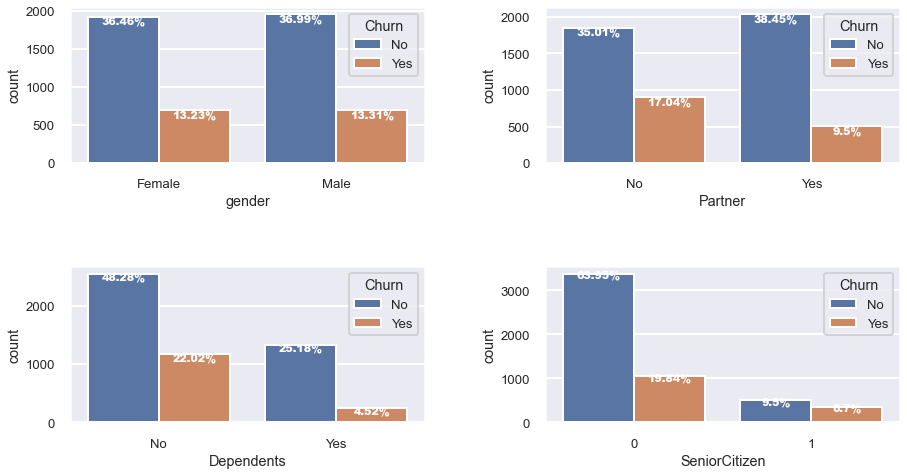

In [1076]:
count_percentage_subplots(['gender', 'Partner', 'Dependents', 'SeniorCitizen'],2,2, "Churn", train, figsize_row = 14, figsize_col = 8 )

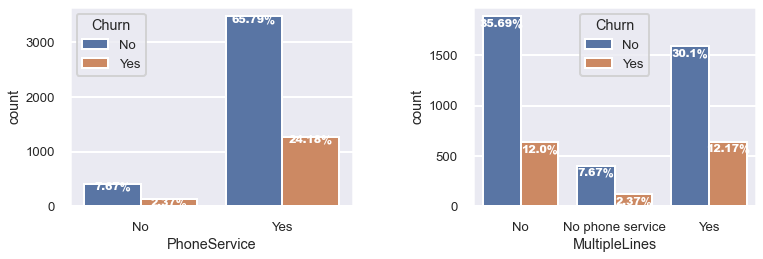

In [1077]:
count_percentage_subplots(['PhoneService','MultipleLines'],1,2, "Churn", train, figsize_row = 12, figsize_col = 5 )

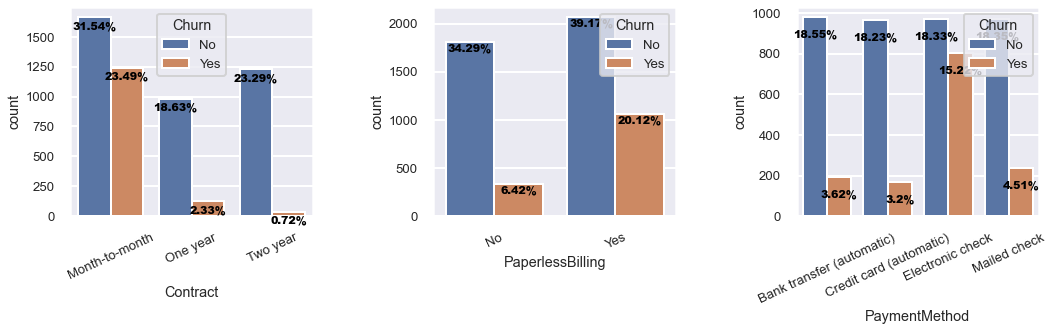

In [1078]:
 count_percentage_subplots(['Contract','PaperlessBilling','PaymentMethod'],1,3, "Churn", train, figsize_row =16 , figsize_col = 6 ,x_ticks_rotation = 25,prcnt_color = 'black')

In [1079]:
x_train.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [1080]:
x_test.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [1081]:
train.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [1082]:
def TTest(data, target, Continuous_features):

    RemoveFeatures=[]
    
    print('The T-Test result are : ')
    for feature in Continuous_features:
        feature_data = data.groupby(target)[feature].apply(list)
        pvalue = ttest_ind(*feature_data)[1]
        # If the T-Test P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target , '| P-Value:', pvalue)
        else:
            print(feature, 'is NOT correlated with', target , '| P-Value:', pvalue)
            RemoveFeatures.append(feature)
    print("\n\n")
    return(RemoveFeatures)

In [1083]:
Continuous_features =['Tenure', 'MonthlyCharges']
remove_features_con = TTest(data=train, target='Churn', Continuous_features = Continuous_features)
print("Features to be removed are :",remove_features_con)

The T-Test result are : 
Tenure is correlated with Churn | P-Value: 6.74501164643183e-146
MonthlyCharges is correlated with Churn | P-Value: 1.5695206211219092e-47



Features to be removed are : []


In [1084]:
categorical_features= list(x_train.columns)
for con in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
  categorical_features.remove(con)

In [1085]:
def ChiSquare( data, target, categorical_features):
    
    # Creating an empty list of final selected predictors
    RemoveFeatures=[]

    print('The ChiSquare result are : \n')
    for feature in categorical_features:
        CrossTabResult=pd.crosstab(index = data[target], columns=data[feature])
        pvalue = chi2_contingency(CrossTabResult)[1]
        # print(Result)
        # If the ChiSquare P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', pvalue)
        else:
            print(feature, 'is \033[1m NOT \033[0m correlated with', target, '| P-Value:', pvalue)   
            RemoveFeatures.append(feature)     
    print("\n\n")
    return(RemoveFeatures)

In [1086]:
remove_features_cat = ChiSquare(data = train, target = 'Churn', categorical_features = categorical_features)
print("Features to be removed are :",remove_features_cat)

The ChiSquare result are : 

customerID is  NOT  correlated with Churn | P-Value: 0.4935308220743649
Gender is  NOT  correlated with Churn | P-Value: 0.9133053640134722
SeniorCitizen is correlated with Churn | P-Value: 1.272738902968206e-26
Partner is correlated with Churn | P-Value: 3.2051580573988954e-26
Dependents is correlated with Churn | P-Value: 1.5736459837130873e-33
PhoneService is  NOT  correlated with Churn | P-Value: 0.11545819531090502
MultipleLines is correlated with Churn | P-Value: 0.004920729444037898
InternetService is correlated with Churn | P-Value: 7.816331813947432e-122
OnlineSecurity is correlated with Churn | P-Value: 3.1008969206083305e-142
OnlineBackup is correlated with Churn | P-Value: 1.7543681370437227e-100
DeviceProtection is correlated with Churn | P-Value: 1.0712098242548213e-91
TechSupport is correlated with Churn | P-Value: 7.966555837638945e-139
StreamingTV is correlated with Churn | P-Value: 2.9763744289949415e-62
StreamingMovies is correlated with 

In [1087]:
x_train.drop(remove_features_cat, axis = 1, inplace = True)
x_train.head()

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6661,0,Yes,Yes,72,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784
4811,0,No,No,4,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6
2193,0,No,Yes,56,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65
1904,0,No,No,56,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6
6667,0,No,No,9,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4


In [1088]:
x_test.drop(remove_features_cat, axis = 1, inplace = True )

In [1089]:
y_train = y_train.map({'Yes':1,'No':0})
y_train.head(3)

6661    0
4811    1
2193    0
Name: Churn, dtype: int64

In [1090]:
y_test = y_test.map({'Yes':1,'No':0})

In [1091]:
for feature in ['Partner', 'Dependents', 'PaperlessBilling']:
  x_train[feature] = x_train[feature].map({'Yes':1,'No':0})
  x_test[feature] = x_test[feature].map({'Yes':1,'No':0})

x_train['MultipleLines'] = x_train.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
x_train['ContractType'] = x_train.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

x_test['MultipleLines'] = x_test.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
x_test['ContractType'] = x_test.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})

for feature in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  x_train[feature] = x_train[feature].map({'Yes':1,'No':0,'No internet service':0})
  x_test[feature] = x_test[feature].map({'Yes':1,'No':0,'No internet service':0})

In [1092]:
x_train = pd.get_dummies(x_train, columns= ['InternetService','PaymentMethod'], drop_first = True)
x_test = pd.get_dummies(x_test, columns= ['InternetService','PaymentMethod'], drop_first = True)

In [1093]:
# TotalCharges is an integer, not an object, so it has to be converted in x_train and x_test
TotalCharges_missing_x_train = x_train[ pd.to_numeric(x_train['TotalCharges'], errors='coerce').isnull()]
for idx in TotalCharges_missing_x_train.index:
  x_train.loc[idx,'TotalCharges'] = x_train.loc[idx]['Tenure'] * x_train.loc[idx]['MonthlyCharges']
x_train['TotalCharges'] = x_train['TotalCharges'].astype(str).astype(float)
x_train['TotalCharges'].dtype

dtype('float64')

In [1094]:
TotalCharges_missing_x_test = x_test[ pd.to_numeric(x_test['TotalCharges'], errors='coerce').isnull()]
for idx in TotalCharges_missing_x_test.index:
  x_test.loc[idx,'TotalCharges'] = x_test.loc[idx]['Tenure'] * x_test.loc[idx]['MonthlyCharges']
x_test['TotalCharges'] = x_test['TotalCharges'].astype(str).astype(float)
x_test['TotalCharges'].dtype

dtype('float64')

In [1095]:
scaler = MinMaxScaler()
minmax_scaler = scaler.fit(x_train[['Tenure','MonthlyCharges','TotalCharges']])
x_train[['Tenure','MonthlyCharges','TotalCharges']] = minmax_scaler.transform(x_train[['Tenure','MonthlyCharges','TotalCharges']])
x_train.head(3)

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6661,0,1,1,1.000000,0,0,1,0,1,1,1,1,0,0.351271,0.435704,0,0,1,0,0
4811,0,0,0,0.055556,0,0,0,0,0,0,0,0,1,0.275037,0.022292,0,0,0,0,1
2193,0,0,1,0.777778,0,0,0,0,0,0,0,1,1,0.027902,0.142623,0,1,0,0,1


In [1096]:
x_test[['Tenure','MonthlyCharges','TotalCharges']] = minmax_scaler.transform(x_test[['Tenure','MonthlyCharges','TotalCharges']])

In [1097]:
def plot_confusion_matrix(y_test, pred):
  cm = confusion_matrix(y_test, pred)
  
  df_cm = pd.DataFrame(cm, [0,1], [0,1])
  plt.figure(figsize=(5,3))
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, fmt='g', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
  plt.title('Confusion Matrix\n', y=1.1)
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  plt.show()

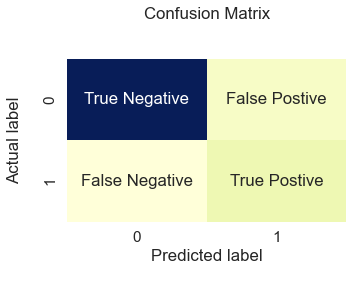

In [1098]:
df_cm = pd.DataFrame([[1000,200],[150,250]],[0,1], [0,1])
annot_arr = np.array([['True Negative','False Postive'],['False Negative','True Postive']], dtype = str)
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=annot_arr, fmt='s', cbar=False, cmap="YlGnBu") # font size , annot_kws={"size": 16}
plt.title('Confusion Matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.show()

In [1099]:
fTwo_scorer = make_scorer(fbeta_score, beta=2)

In [1100]:
def model_metrics(table_name,model_name, y_test, pred, print_cm , print_cr):
  if print_cm == True:
    plot_confusion_matrix(y_test, pred)
    print("\n")
  if print_cr == True:
    print(classification_report(y_test, pred),"\n")

  acc = round( accuracy_score(y_test, pred),4)
  precision = round(precision_score(y_test, pred),4)
  recall = round(recall_score(y_test, pred),4)
  f1 = round(f1_score(y_test, pred),4)
  f2 = round(fbeta_score(y_test, pred, beta = 2),4)
  table_name.loc[table_name.shape[0]] = [model_name ,acc, precision, recall, f1, f2]

In [1101]:
model_performance_without_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [1102]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [1103]:
models_without_hp = []

models_without_hp.append(('Logistic Regression', LogisticRegression(random_state = 42)))

models_without_hp.append(('Linear SVC', SVC(kernel = 'linear', random_state = 42)))

models_without_hp.append(('Kernal SVC', SVC(kernel = 'rbf', random_state = 42)))

models_without_hp.append(('KNN', KNeighborsClassifier()))

models_without_hp.append(('Random Forest', RandomForestClassifier(random_state = 42)))

models_without_hp.append(('Adaboost', AdaBoostClassifier(random_state = 42)))

In [1104]:
for name, model in models_without_hp:
  
  md = model.fit(x_train, y_train)
  pred = md.predict(x_test)

  model_metrics(model_performance_without_hypertuning, name, y_test, pred, False, False)

model_performance_without_hypertuning

,model_name,acc,precision,recall,f1,f2
0,Logistic Regression,0.8030,0.6538,0.5460,0.5951,0.5647
1,Linear SVC,0.7922,0.6278,0.5310,0.5754,0.5479
2,Kernal SVC,0.7939,0.6421,0.5032,0.5642,0.5260
3,KNN,0.7672,0.5671,0.5161,0.5404,0.5255
4,Random Forest,0.7859,0.6236,0.4861,0.5463,0.5085
5,Adaboost,0.7984,0.6481,0.5246,0.5799,0.5454


In [1105]:
log_reg = LogisticRegression(random_state = 42, max_iter= 1000)

param_dist = {
    'C' : [0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty' : ['l1', 'l2',None]
}

log_reg_hp =  RandomizedSearchCV(log_reg , param_distributions = param_dist ,  scoring = fTwo_scorer , cv = 5, random_state= 42)
result1 = log_reg_hp.fit(x_train, y_train)
print(result1.best_estimator_)

LogisticRegression(C=10.0, max_iter=1000, random_state=42)


C:\Users\Datta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Datta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
  File "C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
  File "C:\Users\Datta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

----------------------------------------------------------

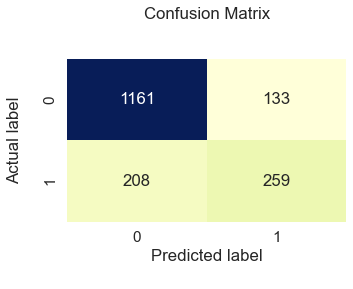



              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761
 

            model_name     acc  precision  recall     f1     f2
0  Logistic Regression  0.8064     0.6607  0.5546  0.603  0.573


In [1106]:
pred_1 = result1.predict(x_test)
model_metrics(model_performance_after_hypertuning, 'Logistic Regression', y_test, pred_1, True, True)

print(model_performance_after_hypertuning.tail(1))

In [1107]:
f2_score_list = []
# odd number of neighbours help in better classification in knn, if even neighbours are given then there can be draw between the number of neighbours supporting each class.
neighbors = [x for x in range(1,40) if x % 2 != 0]
print("K-Neighbours considered are :",neighbors)
for i in neighbors:
 knn = KNeighborsClassifier(n_neighbors=i)
 cross_val_scr = cross_val_score(knn, x_train, y_train, scoring = fTwo_scorer, cv=5)
 f2_score_list.append(cross_val_scr.mean())

K-Neighbours considered are : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


Max F2 score:- 0.5770418430727028 at K = 31


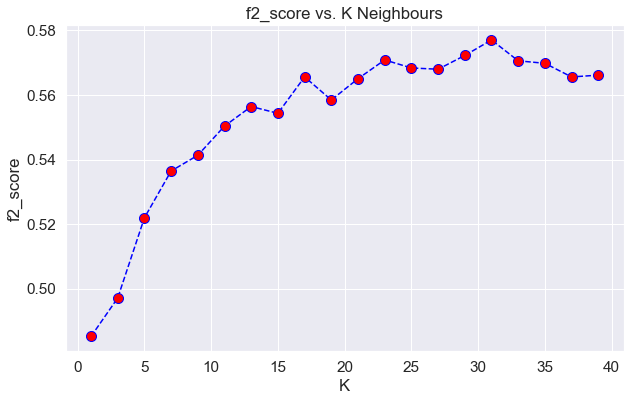

In [1108]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,f2_score_list,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('f2_score vs. K Neighbours')
plt.xlabel('K')
plt.ylabel('f2_score')
max_index = f2_score_list.index(max(f2_score_list))
max_index = neighbors[max_index]
print("Max F2 score:-",max(f2_score_list),"at K =",max_index)

#### KNN

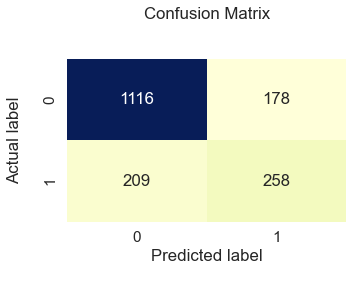



              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1294
           1       0.59      0.55      0.57       467

    accuracy                           0.78      1761
   macro avg       0.72      0.71      0.71      1761
weighted avg       0.78      0.78      0.78      1761
 



,model_name,acc,precision,recall,f1,f2
1,KNN,0.7802,0.5917,0.5525,0.5714,0.5599


In [1109]:
knn = KNeighborsClassifier(n_neighbors=31)
KNN = knn.fit(x_train, y_train)
pred_4 = KNN.predict(x_test)

model_metrics(model_performance_after_hypertuning, 'KNN', y_test, pred_4, True, True)

model_performance_after_hypertuning.tail(1)

#### Random Forest

In [1110]:
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)

param_grid = {'n_estimators' : [40,80,100,120,160,200,250,300],
              'max_depth' : max_depth,
              'min_samples_split' : [None,2,4,6,8],
              'min_samples_leaf' : [None,1,2,3],
              'criterion': ['gini','entropy'],
              'max_features' : ['sqrt', 'log2']}

In [1111]:
rf = RandomForestClassifier(random_state=42)

random_forest_hp =  RandomizedSearchCV(rf, param_distributions = param_grid , scoring = fTwo_scorer , cv = 5, random_state= 42)
result5 = random_forest_hp.fit(x_train, y_train)

result5.best_estimator_

C:\Users\Datta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Datta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
  File "C:\Users\Datta\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
  File "C:\Users\Datta\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Datta\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(ta

RandomForestClassifier(criterion='entropy', max_depth=45, max_features='log2',
                       min_samples_leaf=3, n_estimators=250, random_state=42)

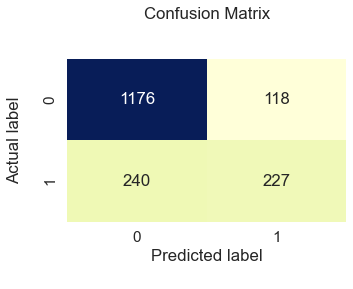



              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.49      0.56       467

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.80      0.79      1761
 



,model_name,acc,precision,recall,f1,f2
2,Random_forest,0.7967,0.658,0.4861,0.5591,0.5129


In [1112]:
pred_5 = random_forest_hp.predict(x_test)

model_metrics(model_performance_after_hypertuning, 'Random_forest', y_test, pred_5, True, True)

model_performance_after_hypertuning.tail(1)

#### AdaBoost

In [1113]:
param_grid2 = {'n_estimators' : [40,80,100,120,160,200,250,300],
              'learning_rate' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]}
AdaBoost = AdaBoostClassifier(random_state = 42)

adaboost_hp = RandomizedSearchCV(AdaBoost , param_distributions = param_grid2 , scoring = fTwo_scorer , cv = 5, random_state= 42)

result6 = adaboost_hp.fit(x_train, y_train)

result6.best_estimator_

AdaBoostClassifier(n_estimators=120, random_state=42)

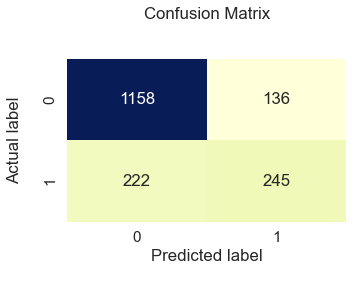



              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1294
           1       0.64      0.52      0.58       467

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761
 



,model_name,acc,precision,recall,f1,f2
3,AdaBoost,0.7967,0.643,0.5246,0.5778,0.5447


In [1114]:
pred_6 = adaboost_hp.predict(x_test)

model_metrics(model_performance_after_hypertuning, 'AdaBoost', y_test, pred_6, True, True)

model_performance_after_hypertuning.tail(1)

In [1115]:
model_performance_without_hypertuning

,model_name,acc,precision,recall,f1,f2
0,Logistic Regression,0.8030,0.6538,0.5460,0.5951,0.5647
1,Linear SVC,0.7922,0.6278,0.5310,0.5754,0.5479
2,Kernal SVC,0.7939,0.6421,0.5032,0.5642,0.5260
3,KNN,0.7672,0.5671,0.5161,0.5404,0.5255
4,Random Forest,0.7859,0.6236,0.4861,0.5463,0.5085
5,Adaboost,0.7984,0.6481,0.5246,0.5799,0.5454


**Insights**

- The model with highest F2-Score is "Logistic Regression" model after Hyper Parameter Tuning. 
- So we can finalize this model. It also gives an accuracy of 80.64%